# 1. Import necessary libraries 

In [22]:
import pandas as pd 
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
 
import warnings 
warnings.filterwarnings('ignore')

# 2.Import Dataset 

In [23]:
cancer_data= load_breast_cancer()

In [24]:
cancer_data_df= pd.DataFrame(data=cancer_data.data,columns=cancer_data.feature_names)
cancer_data_df['Target']= cancer_data.target
cancer_data_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


# 3.Data Understanding 

In [25]:
cancer_data_df.shape 

(569, 31)

In [26]:
cancer_data_df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
Target                     0
dtype: int64

In [27]:
cancer_data_df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

# Correlation Analysis 

In [28]:
cancer_data_df.corr().round(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
mean radius,1.00,0.32,1.00,0.99,0.17,0.51,0.68,0.82,0.15,-0.31,...,0.30,0.97,0.94,0.12,0.41,0.53,0.74,0.16,0.01,-0.73
mean texture,0.32,1.00,0.33,0.32,-0.02,0.24,0.30,0.29,0.07,-0.08,...,0.91,0.36,0.34,0.08,0.28,0.30,0.30,0.11,0.12,-0.42
mean perimeter,1.00,0.33,1.00,0.99,0.21,0.56,0.72,0.85,0.18,-0.26,...,0.30,0.97,0.94,0.15,0.46,0.56,0.77,0.19,0.05,-0.74
mean area,0.99,0.32,0.99,1.00,0.18,0.50,0.69,0.82,0.15,-0.28,...,0.29,0.96,0.96,0.12,0.39,0.51,0.72,0.14,0.00,-0.71
mean smoothness,0.17,-0.02,0.21,0.18,1.00,0.66,0.52,0.55,0.56,0.58,...,0.04,0.24,0.21,0.81,0.47,0.43,0.50,0.39,0.50,-0.36
mean compactness,0.51,0.24,0.56,0.50,0.66,1.00,0.88,0.83,0.60,0.57,...,0.25,0.59,0.51,0.57,0.87,0.82,0.82,0.51,0.69,-0.60
mean concavity,0.68,0.30,0.72,0.69,0.52,0.88,1.00,0.92,0.50,0.34,...,0.30,0.73,0.68,0.45,0.75,0.88,0.86,0.41,0.51,-0.70
mean concave points,0.82,0.29,0.85,0.82,0.55,0.83,0.92,1.00,0.46,0.17,...,0.29,0.86,0.81,0.45,0.67,0.75,0.91,0.38,0.37,-0.78
mean symmetry,0.15,0.07,0.18,0.15,0.56,0.60,0.50,0.46,1.00,0.48,...,0.09,0.22,0.18,0.43,0.47,0.43,0.43,0.70,0.44,-0.33
mean fractal dimension,-0.31,-0.08,-0.26,-0.28,0.58,0.57,0.34,0.17,0.48,1.00,...,-0.05,-0.21,-0.23,0.50,0.46,0.35,0.18,0.33,0.77,0.01


# 4.Model Building 

In [29]:
X = cancer_data_df.drop('Target',axis = 1)
y = cancer_data_df[['Target']]

In [30]:
x.shape, y.shape 

((569, 30), (569, 1))

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=12,stratify=y)

In [32]:
x_train.shape,y_train.shape 

((455, 30), (455, 1))

# 5.Model Training 

In [33]:
dt_model = DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=12)
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=12)

# 6.Model Testing || 7.Model Evalution 

# Train Data 

In [34]:
y_pred_train = dt_model.predict(x_train)
accuracy_score(y_train,y_pred_train)

0.9846153846153847

# Test Data 

In [36]:
y_pred_test = dt_model.predict(x_test)
accuracy_score(y_test,y_pred_test)

0.9035087719298246

# ++++==========================++++

# APPLYING PCA 

# Data Preprocessing before Applying PCA 

In [42]:
from sklearn.preprocessing import MinMaxScaler
min_max  = MinMaxScaler()
scaled_X = min_max.fit_transform(X)
scaled_X = pd.DataFrame(scaled_X,columns=cancer_data.feature_names)
scaled_X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


In [56]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(scaled_X)
X_pca = pd.DataFrame(X_pca,columns = ['PC1','PC2'])
X_pca

,PC1,PC2
0,1.387021,0.426895
1,0.462308,-0.556947
2,0.954621,-0.109701
3,1.000816,1.525089
4,0.626828,-0.302471
...,...,...
564,1.002840,-0.474785
565,0.620757,-0.517200
566,0.226311,-0.287946
567,1.677834,0.335946


In [51]:
pca.explained_variance_ratio_

array([0.53097689, 0.1728349 ])

# 5. Model Building 

In [57]:
x_train,x_test,y_train,y_test =train_test_split(x_pca,y,test_size=0.20,random_state=12,stratify=y)

In [58]:
x_train.shape,y_test.shape 

((455, 2), (114, 1))

In [59]:
x_test.shape,y_test.shape

((114, 2), (114, 1))

# 6. Model Training 

In [60]:
dt_model = DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=12)
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=12)

# 7.Model Testing || 8.Model Evaluation

## Train Data 

In [61]:
y_pred_train = dt_model.predict(x_train)
accuracy_score(y_train,y_pred_train)

0.9692307692307692

## Test Data 

In [63]:
y_pred_test  = dt_model.predict(x_test)
accuracy_score(y_test,y_pred_test)

0.9035087719298246

## Let's Vizualize 

In [64]:
y

,Target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


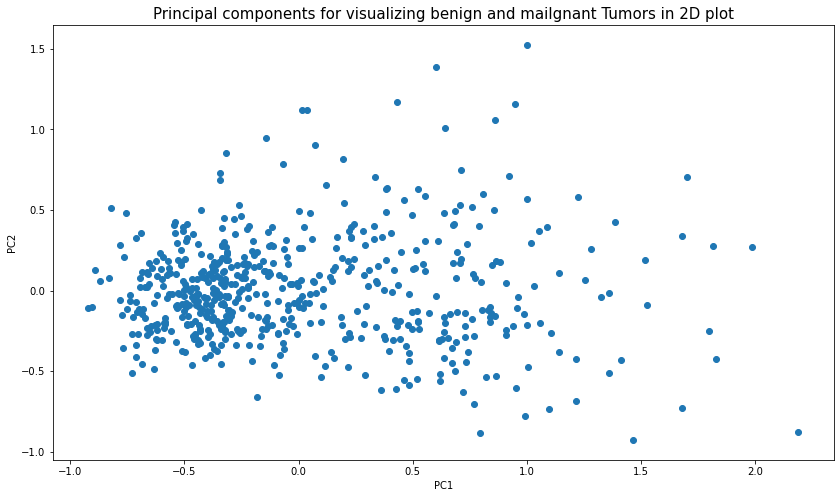

In [66]:
from matplotlib import pyplot as plt 
plt.figure(figsize=(14,8))
plt.scatter(X_pca.iloc[:,0],X_pca.iloc[:,1])
plt.title('Principal components for visualizing benign and mailgnant Tumors in 2D plot' , size = 15)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# The End 